<a href="https://colab.research.google.com/github/RonakPandya072/Portfolio-constructiona-and-analysis/blob/main/Part%2001/Introduction_to_portfolio_construction_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# calculating Risk and Volatility

In [ ]:
df = pd.read_csv('sample_prices.csv')

In [ ]:
df.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


**Return calculation**

Method 1

In [ ]:
risk = df.pct_change()

In [ ]:
risk

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


Method 2

In [ ]:
df.iloc[1:].values/df.iloc[:-1] - 1
#df.iloc[1:]/df.iloc[:-1].values

,BLUE,ORANGE
0,0.023621,0.039662
1,-0.021807,-0.033638
2,-0.031763,0.082232
3,0.034477,0.044544
4,0.037786,-0.026381
5,-0.011452,-0.049187
6,0.032676,0.117008
7,-0.012581,0.067353
8,0.029581,0.078249
9,0.006151,-0.168261


Method 3

In [ ]:
df/df.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


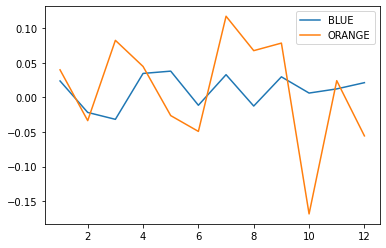

In [ ]:
risk.plot()

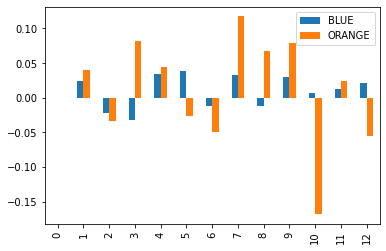

In [ ]:
risk.plot.bar()

In [ ]:
risk.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [ ]:
risk.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Look at the mean return of both the data, it is same, but the variance/ volatility is different. orange data has high volatility compared to blue, which is clearly visible from the graph.

#Risk adjusted returns

In [ ]:
return_ = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv',header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [ ]:
return_.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [ ]:
col = ['Lo 10','Hi 10']
rtn = return_[col]

In [ ]:
rtn.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [ ]:
rtn = rtn / 100

In [ ]:
rtn.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [ ]:
rtn.columns=['Small cap','Large cap']

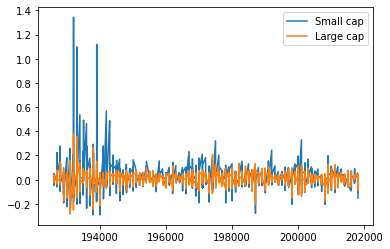

In [ ]:
rtn.plot()

Small caps are large volatile than large cap

In [ ]:
rtn.std()

Small cap    0.106288
Large cap    0.053900
dtype: float64

In [ ]:
#Annual returns
annual_vol = rtn.std()*np.sqrt(12)  #b/c given returns are monthly returns
annual_vol

Small cap    0.368193
Large cap    0.186716
dtype: float64

In [ ]:
n_months = rtn.shape[0]
return_per_month = ((rtn + 1).prod())**(1/n_months)-1     #think just reverse of monthly to annually return calculation
return_per_month

Small cap    0.012986
Large cap    0.007423
dtype: float64

In [ ]:
annualized_return = (return_per_month + 1)**12 -1
annualized_return

Small cap    0.167463
Large cap    0.092810
dtype: float64

Another way to calculate the annularized return

In [ ]:
annualized_return = ((rtn + 1).prod())**(12/n_months) - 1
annualized_return

Small cap    0.167463
Large cap    0.092810
dtype: float64

In [ ]:
ROR = annualized_return / annual_vol  #Return on risk ratio
ROR

Small cap    0.454825
Large cap    0.497063
dtype: float64

In [ ]:
#Calculating risk free rate
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharp_ratio = excess_return / annual_vol
sharp_ratio

Small cap    0.373346
Large cap    0.336392
dtype: float64

**calculation for Lo 30 and Hi 30**

In [ ]:
col = ['Lo 30','Hi 30']
rtn = return_[col]

In [ ]:
rtn.head()

,Lo 30,Hi 30
192607,-0.43,2.68
192608,3.90,2.09
192609,-1.08,0.16
192610,-3.32,-3.06
192611,-0.46,3.09


In [ ]:
rtn = rtn/100
rtn

,Lo 30,Hi 30
192607,-0.0043,0.0268
192608,0.0390,0.0209
192609,-0.0108,0.0016
192610,-0.0332,-0.0306
192611,-0.0046,0.0309
...,...,...
201808,0.0347,0.0287
201809,-0.0224,0.0008
201810,-0.1076,-0.0763
201811,-0.0208,0.0219


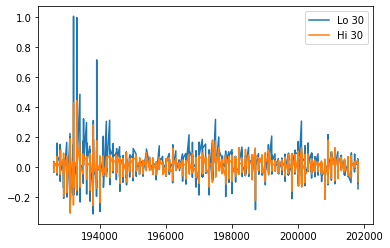

In [ ]:
rtn.plot()

In [ ]:
rtn.std()

Lo 30    0.091210
Hi 30    0.058157
dtype: float64

In [ ]:
annual_vol = rtn.std()*np.sqrt(12)  #b/c given returns are monthly returns
annual_vol

Lo 30    0.315962
Hi 30    0.201462
dtype: float64

In [ ]:
annualized_return = ((rtn + 1).prod())**(12/n_months) - 1
annualized_return

Lo 30    0.144204
Hi 30    0.102293
dtype: float64

In [ ]:
ROR = annualized_return / annual_vol  #Return on risk ratio
ROR

Lo 30    0.456399
Hi 30    0.507755
dtype: float64

In [ ]:
#Calculating risk free rate
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharp_ratio = excess_return / annual_vol
sharp_ratio

Lo 30    0.361450
Hi 30    0.358843
dtype: float64

Same observation. Hi 30 has low sharp ratio than the Lo 30. Same thing happens in small cap and large cap example.

#Drawdown calculations

In [23]:
import pandas as pd
df = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', header = 0, index_col=0, parse_dates=True, na_values=-99.99)


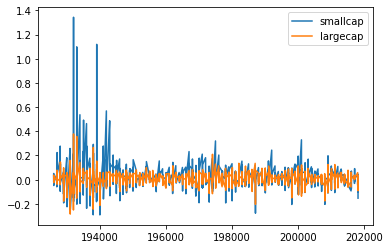

In [24]:
rets = df[['Lo 10','Hi 10']]
rets.columns = ['smallcap', 'largecap']
rets = rets/100
rets.plot.line()

In [25]:
rets.head()

,smallcap,largecap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [26]:
rets.index = pd.to_datetime(rets.index, format ="%Y%m")

In [27]:
rets.head() #here index is converted into date format but the additional one is there, and we want to change the date and time into period wise

,smallcap,largecap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [31]:
type(rets.index)

pandas.core.indexes.period.PeriodIndex

In [28]:
rets.index = rets.index.to_period('m')

In [29]:
rets.head()

,smallcap,largecap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [30]:
rets['1975']

,smallcap,largecap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [32]:
type(rets.index)

pandas.core.indexes.period.PeriodIndex

In [35]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   smallcap  1110 non-null   float64
 1   largecap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


**calculating drawdown**

1---> compute a welth index

2---> compute a previous peak

3--->compue a drwadown which is welth value as a percentage of the previous peak

In [37]:
welth_index = 1000*(1+rets['largecap']).cumprod()

In [38]:
welth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: largecap, dtype: float64

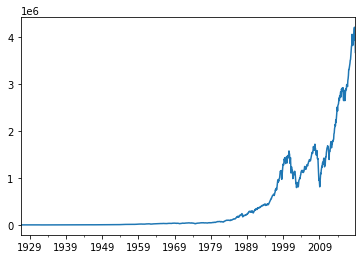

In [39]:
welth_index.plot.line()

In [40]:
previous_peak = welth_index.cummax()

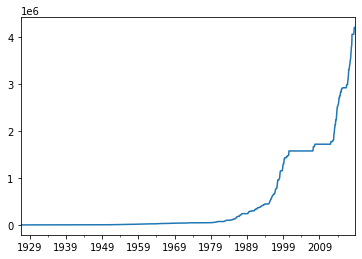

In [41]:
previous_peak.plot()

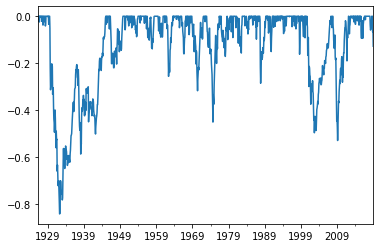

In [43]:
drwadown = (welth_index - previous_peak)/previous_peak  #calculating % drwadown
drwadown.plot()

In [44]:
drwadown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: largecap, dtype: float64

In [45]:
drwadown.min()

-0.8400375277943123

In [47]:
drwadown['1975':].idxmin()  #gives index of min value after 1975

Period('2009-02', 'M')

In [48]:
drwadown.idxmin()

Period('1932-05', 'M')

In [49]:
#creating a function to calculate the drawdown
def Drwadown(return_series :pd.Series):
  """
  It takes a time series of asset retuens and retuens, wealth index,
  previous peak and percent drawdown 
  """
  wealth_idx = 1000*(1+return_series).cumprod()
  previous_peak = wealth_idx.cummax()
  drawdowns = (wealth_idx - previous_peak)/previous_peak

  return pd.DataFrame({
      'Wealth_index': wealth_idx,
      'Peaks':previous_peak,
      '% Drawdown': drawdowns
  })

In [52]:
Drwadown(rets['largecap']).head()

,Wealth_index,Peaks,% Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


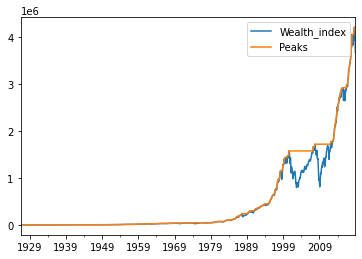

In [53]:
Drwadown(rets['largecap'])[['Wealth_index','Peaks']].plot()

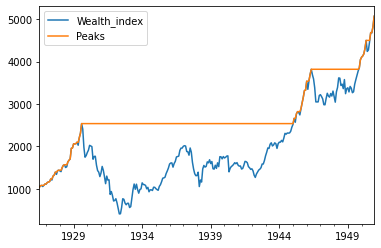

In [54]:
Drwadown(rets[:'1950']['largecap'])[['Wealth_index','Peaks']].plot()

In [59]:
Drwadown(rets['largecap'])['% Drawdown'].min()

-0.8400375277943123

In [60]:
Drwadown(rets['smallcap'])['% Drawdown'].min()

-0.8330007793945303

In [61]:
Drwadown(rets['largecap'])['% Drawdown'].idxmin()

Period('1932-05', 'M')

In [62]:
Drwadown(rets['smallcap'])['% Drawdown'].idxmin()

Period('1932-05', 'M')

In [63]:
Drwadown(rets['1940':]['largecap'])['% Drawdown'].min()

-0.5280945042309305

In [64]:
Drwadown(rets['1940':]['smallcap'])['% Drawdown'].min()

-0.7000596091967917

In [66]:
Drwadown(rets['1940':]['largecap'])['% Drawdown'].idxmin()

Period('2009-02', 'M')

In [65]:
Drwadown(rets['1940':]['smallcap'])['% Drawdown'].idxmin()

Period('1974-12', 'M')